In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt 

%matplotlib inline

In [21]:
from geopandas.tools import sjoin

In [2]:
mn2015 = pd.read_csv('mn2015.csv')

In [4]:
mn2015.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [5]:
ls

ads_geospatial_intersection.ipynb        __MACOSX/
DOF_Sales_Exploration.ipynb              mn2015.csv
drive-download-20171203T234303Z-001/     unique_listings1516.csv
drive-download-20171203T234303Z-001.zip  unique_listings.csv
inside_airbnb_data.csv


In [6]:
bbl = gp.GeoDataFrame.from_file('drive-download-20171203T234303Z-001/buffer500meters.shp')

In [7]:
bbl.head()

,Borough,ZipCode,BBL,geometry
0,BK,11224,3.070360e+09,"POLYGON ((981229.6322855615 149526.84859999, 9..."
1,BK,11224,3.070370e+09,"POLYGON ((981274.4887737731 149276.5486705538,..."
2,BK,11224,3.086960e+09,"POLYGON ((990621.7646485794 148530.7255509223,..."
3,BK,11224,3.070290e+09,"POLYGON ((983405.4670232051 148690.8695704278,..."
4,BK,11224,3.070490e+09,"POLYGON ((985415.2724194435 148767.2932753136,..."


In [8]:
bbl.Borough.unique()

array(['BK', 'BX', 'QN', 'SI', 'MN'], dtype=object)

In [9]:
bbl_mn = bbl[bbl['Borough'] == 'MN']

In [18]:
bbl_mn.head()

,Borough,ZipCode,BBL,geometry
814550,MN,10004,1.000010e+09,"POLYGON ((973417.350848882 193838.4741984035, ..."
814551,MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
814552,MN,10004,1.000158e+09,"POLYGON ((980359.1617430281 196346.8749880171,..."
814553,MN,10004,1.000130e+09,"POLYGON ((980793.6647960587 196230.7192602466,..."
814554,MN,10004,1.000010e+09,"POLYGON ((979454.8706832418 190215.533423931, ..."


In [34]:
abb = pd.read_csv('unique_listings1516.csv')

abb.head()

,Unnamed: 0,id,latitude,longitude,year,geometry
0,0,1069266,40.756852,-73.964754,2015,POINT (-73.96475423499014 40.75685194386187)
1,1,1846722,40.830599,-73.941014,2015,POINT (-73.94101427789765 40.83059906748076)
2,2,2061725,40.692189,-73.924120,2015,POINT (-73.92412000114966 40.69218932278581)
3,3,44974,40.734751,-74.002592,2015,POINT (-74.00259246421851 40.73475108783765)
4,4,4701675,40.745282,-73.997836,2015,POINT (-73.99783627201059 40.74528161142444)


In [35]:
abb.drop(['Unnamed: 0'], axis=1, inplace=True)
abb.head()

,id,latitude,longitude,year,geometry
0,1069266,40.756852,-73.964754,2015,POINT (-73.96475423499014 40.75685194386187)
1,1846722,40.830599,-73.941014,2015,POINT (-73.94101427789765 40.83059906748076)
2,2061725,40.692189,-73.924120,2015,POINT (-73.92412000114966 40.69218932278581)
3,44974,40.734751,-74.002592,2015,POINT (-74.00259246421851 40.73475108783765)
4,4701675,40.745282,-73.997836,2015,POINT (-73.99783627201059 40.74528161142444)


In [42]:
import shapely
# combine lat and lon to one column
abb['lonlat']=list(zip(abb.longitude,abb.latitude))
# Create Point Geometry for based on lonlat column
abb['geometry']=abb['lonlat'].apply(lambda x:shapely.geometry.Point(x))
abb.head()

,id,latitude,longitude,year,geometry,lonlat
0,1069266,40.756852,-73.964754,2015,POINT (-73.96475423499014 40.75685194386187),"(-73.964754235, 40.7568519439)"
1,1846722,40.830599,-73.941014,2015,POINT (-73.94101427789765 40.83059906748076),"(-73.9410142779, 40.8305990675)"
2,2061725,40.692189,-73.924120,2015,POINT (-73.92412000114966 40.69218932278581),"(-73.9241200011, 40.6921893228)"
3,44974,40.734751,-74.002592,2015,POINT (-74.00259246421851 40.73475108783765),"(-74.0025924642, 40.7347510878)"
4,4701675,40.745282,-73.997836,2015,POINT (-73.99783627201059 40.74528161142444),"(-73.997836272, 40.7452816114)"


In [ ]:
spatial_index = gdf.sindex
possible_matches_index = list(spatial_index.intersection(polygon.bounds))
possible_matches = gdf.iloc[possible_matches_index]
precise_matches = possible_matches[possible_matches.intersects(polygon)]

In [ ]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(bbl_mn)):
    a.append(bbl_mn[bbl_mn.geometry.intersects(abb.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4]

In [20]:
bbl_mn.shape

(42686, 4)

In [55]:
# converting to geodataframe

#g_abb = gp.GeoDataFrame(abb, geometry='geometry')
g_bbl_mn = gp.GeoDataFrame(bbl_mn, geometry='geometry')

In [57]:
g_bbl_mn.head()

,Borough,ZipCode,BBL,geometry
814550,MN,10004,1.000010e+09,"POLYGON ((973417.350848882 193838.4741984035, ..."
814551,MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
814552,MN,10004,1.000158e+09,"POLYGON ((980359.1617430281 196346.8749880171,..."
814553,MN,10004,1.000130e+09,"POLYGON ((980793.6647960587 196230.7192602466,..."
814554,MN,10004,1.000010e+09,"POLYGON ((979454.8706832418 190215.533423931, ..."


In [62]:
g_abb = gp.GeoDataFrame(abb, geometry='geometry')

In [50]:
from fiona.crs import from_epsg

g_abb.crs = from_epsg(4326)

g_abb = g_abb.to_crs(epsg=2263)
g_bbl_mn = g_bbl_mn.to_crs(epsg=2263)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [63]:
g_abb.crs = from_epsg(4326)

g_abb = g_abb.to_crs(epsg=2263)

In [65]:
g_abb.head()

,id,latitude,longitude,year,geometry,lonlat
0,1069266,40.756852,-73.964754,2015,POINT (994014.6405478035 215020.2362056455),"(-73.964754235, 40.7568519439)"
1,1846722,40.830599,-73.941014,2015,POINT (1000573.568421952 241892.3987773972),"(-73.9410142779, 40.8305990675)"
2,2061725,40.692189,-73.924120,2015,POINT (1005292.531286072 191468.7922802223),"(-73.9241200011, 40.6921893228)"
3,44974,40.734751,-74.002592,2015,POINT (983531.5340777279 206966.2333386894),"(-74.0025924642, 40.7347510878)"
4,4701675,40.745282,-73.997836,2015,POINT (984849.5527858048 210802.83365854),"(-73.997836272, 40.7452816114)"


In [58]:
print(g_bbl_mn.crs)

None


In [59]:
g_bbl_mn.crs = from_epsg(2263)

#g_bbl_mn = g_bbl_mn.to_crs(epsg=2263)

In [60]:
g_bbl_mn.head()

,Borough,ZipCode,BBL,geometry
814550,MN,10004,1.000010e+09,"POLYGON ((973417.350848882 193838.4741984035, ..."
814551,MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
814552,MN,10004,1.000158e+09,"POLYGON ((980359.1617430281 196346.8749880171,..."
814553,MN,10004,1.000130e+09,"POLYGON ((980793.6647960587 196230.7192602466,..."
814554,MN,10004,1.000010e+09,"POLYGON ((979454.8706832418 190215.533423931, ..."


In [67]:
merged=sjoin(g_abb, g_bbl_mn, how='right',op='within')

In [68]:
merged.head()

,index_left,id,latitude,longitude,year,lonlat,Borough,ZipCode,BBL,geometry
index_right,,,,,,,,,,
814551,17109.0,4100500.0,40.704154,-74.013679,2015.0,"(-74.01367915, 40.7041544195)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
814551,142102.0,2059866.0,40.702374,-74.013707,2015.0,"(-74.0137069103, 40.7023739259)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
814551,113471.0,2101323.0,40.702471,-74.012474,2015.0,"(-74.0124738868, 40.7024707307)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
814551,76369.0,2101323.0,40.702471,-74.012474,2016.0,"(-74.0124738868, 40.7024707307)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
814551,144915.0,4349636.0,40.702779,-74.015081,2015.0,"(-74.015081348, 40.7027790473)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."


In [70]:
merged.reset_index(inplace=True)

merged.head()

,index_right,index_left,id,latitude,longitude,year,lonlat,Borough,ZipCode,BBL,geometry
0,814551,17109.0,4100500.0,40.704154,-74.013679,2015.0,"(-74.01367915, 40.7041544195)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
1,814551,142102.0,2059866.0,40.702374,-74.013707,2015.0,"(-74.0137069103, 40.7023739259)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
2,814551,113471.0,2101323.0,40.702471,-74.012474,2015.0,"(-74.0124738868, 40.7024707307)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
3,814551,76369.0,2101323.0,40.702471,-74.012474,2016.0,"(-74.0124738868, 40.7024707307)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."
4,814551,144915.0,4349636.0,40.702779,-74.015081,2015.0,"(-74.015081348, 40.7027790473)",MN,10004,1.000090e+09,"POLYGON ((980902.1095546867 195359.1261330688,..."


In [73]:
merged.groupby('index_right').count()['id']

index_right
814550      0
814551     12
814552    126
814553     79
814554      0
814555      0
814556     74
814557     19
814558      8
814559     39
814560     25
814561     81
814562     31
814563      4
814564     46
814565      6
814566      1
814567     86
814568     16
814569     12
814570    111
814571    108
814572    385
814573     27
814574    227
814575    207
814576    358
814577      3
814578    200
814579     55
         ... 
857206    277
857207    316
857208    287
857209    170
857210    192
857211    203
857212     94
857213    251
857214    180
857215    179
857216     94
857217    157
857218    100
857219     93
857220    176
857221    107
857222    111
857223     60
857224     90
857225    118
857226     77
857227    123
857228    117
857229    139
857230    134
857231    105
857232     55
857233    103
857234    110
857235    129
Name: id, dtype: int64

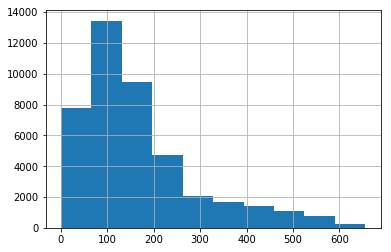

In [80]:
merged.groupby('index_right').count()['id'].hist()

In [74]:
merged.groupby('index_right').count()['id'].describe()

count    42686.000000
mean       167.449328
std        127.480956
min          0.000000
25%         82.000000
50%        132.000000
75%        210.000000
max        656.000000
Name: id, dtype: float64

In [77]:
merged.groupby('index_right').count()['id'].idxmax()

830602

In [79]:
merged[merged['index_right'] == 830602]

,index_right,index_left,id,latitude,longitude,year,lonlat,Borough,ZipCode,BBL,geometry
3840717,830602,87472.0,9990611.0,40.762510,-73.988773,2016.0,"(-73.9887734515, 40.762510055)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840718,830602,80759.0,1333269.0,40.762541,-73.988535,2016.0,"(-73.9885354446, 40.7625411719)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840719,830602,1879.0,1333269.0,40.762541,-73.988535,2015.0,"(-73.9885354446, 40.7625411719)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840720,830602,92421.0,10166624.0,40.762561,-73.988992,2016.0,"(-73.9889919881, 40.76256125)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840721,830602,142227.0,6028900.0,40.762571,-73.988401,2015.0,"(-73.9884008596, 40.7625712199)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840722,830602,49657.0,11086445.0,40.762610,-73.988703,2016.0,"(-73.9887029607, 40.7626104876)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840723,830602,98965.0,6568302.0,40.762611,-73.988971,2016.0,"(-73.9889709823, 40.7626111578)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840724,830602,117616.0,6568302.0,40.762611,-73.988971,2015.0,"(-73.9889709823, 40.7626111578)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840725,830602,76982.0,8868525.0,40.762612,-73.988587,2016.0,"(-73.9885865296, 40.7626121938)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."
3840726,830602,49958.0,5031539.0,40.762628,-73.988697,2016.0,"(-73.9886969764, 40.7626281153)",MN,10036,1.010380e+09,"POLYGON ((987575.3895050851 216807.1899481515,..."


In [81]:
ls

ads_geospatial_intersection.ipynb
DOF_Sales_Exploration.ipynb
drive-download-20171203T234303Z-001/
drive-download-20171203T234303Z-001.zip
drive-download-20171204T023352Z-001/
drive-download-20171204T023352Z-001.zip
__MACOSX/
mn2015.csv
unique_listings1516.csv


In [82]:
bbl2 = gp.GeoDataFrame.from_file('drive-download-20171204T023352Z-001/buffer100meters.shp')

In [83]:
bbl2.head()

,Borough,ZipCode,BBL,geometry
0,BK,11224,3.070360e+09,"POLYGON ((980829.6322855615 149526.84859999, 9..."
1,BK,11224,3.070370e+09,"POLYGON ((980874.4887737731 149276.5486705538,..."
2,BK,11224,3.086960e+09,"POLYGON ((990221.7646485794 148530.7255509223,..."
3,BK,11224,3.070290e+09,"POLYGON ((983005.4670232051 148690.8695704278,..."
4,BK,11224,3.070490e+09,"POLYGON ((985015.2724194435 148767.2932753136,..."


In [84]:
bbl_100_mn = bbl2[bbl2['Borough'] == 'MN']

In [85]:
bbl_100_mn.crs = from_epsg(2263)

In [87]:
merged_100 = sjoin(g_abb, bbl_100_mn, how='right',op='within')

In [89]:
merged_100.head()

,index_left,id,latitude,longitude,year,lonlat,Borough,ZipCode,BBL,geometry
index_right,,,,,,,,,,
814552,42479.0,7852297.0,40.705797,-74.015714,2016.0,"(-74.0157144223, 40.7057965979)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
814552,97804.0,8898230.0,40.705804,-74.015869,2016.0,"(-74.0158693997, 40.7058041087)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
814552,113360.0,8898230.0,40.705804,-74.015869,2015.0,"(-74.0158693997, 40.7058041087)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
814552,76357.0,6637806.0,40.705811,-74.015821,2016.0,"(-74.015821414, 40.7058111124)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
814552,23383.0,2076014.0,40.705381,-74.015836,2015.0,"(-74.015835753, 40.7053811018)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."


In [90]:
merged_100.reset_index(inplace=True)

merged_100.head()

,index_right,index_left,id,latitude,longitude,year,lonlat,Borough,ZipCode,BBL,geometry
0,814552,42479.0,7852297.0,40.705797,-74.015714,2016.0,"(-74.0157144223, 40.7057965979)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
1,814552,97804.0,8898230.0,40.705804,-74.015869,2016.0,"(-74.0158693997, 40.7058041087)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
2,814552,113360.0,8898230.0,40.705804,-74.015869,2015.0,"(-74.0158693997, 40.7058041087)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
3,814552,76357.0,6637806.0,40.705811,-74.015821,2016.0,"(-74.015821414, 40.7058111124)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."
4,814552,23383.0,2076014.0,40.705381,-74.015836,2015.0,"(-74.015835753, 40.7053811018)",MN,10004,1.000158e+09,"POLYGON ((979959.1617430281 196346.8749880171,..."


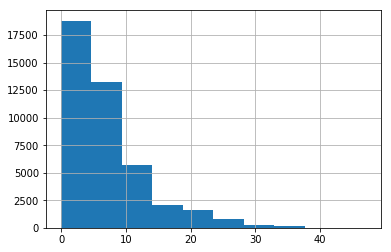

In [92]:
merged_100.groupby('BBL').count()['id'].hist()